# Simulating Light Curves from Power Law Power Spectra

In this notebook, we will show how to simulate a light curve from a power spectrum that 
follows a power law shape.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

The power distribution is of the form `S(w) = (1/w)^B`. Define a function to recover time series from power law spectrum.

In [21]:
def simulate(B):
    
    N = 1024
    
    # Define frequencies from 0 to 2*pi
    w = np.linspace(0.001,2*np.pi,N)
        
    # Draw two set of 'N' guassian distributed numbers
    a1 = np.random.normal(size=N)
    a2 = np.random.normal(size=N)
    
    # Multiply by (1/w)^B to get real and imaginary parts
    real = a1 * np.power((1/w),B/2)
    imaginary = a2 * np.power((1/w),B/2)
    
    # Form complex numbers corresponding to each frequency
    f = [complex(r, i) for r,i in zip(real,imaginary)]
       
    # Obtain real valued time series
    f_conj = np.conjugate(np.array(f))
    
    # Obtain time series
    f_inv = np.fft.ifft(f_conj)

    return f_inv

Start with `B=1` to get a _flicker noise_ distribution.

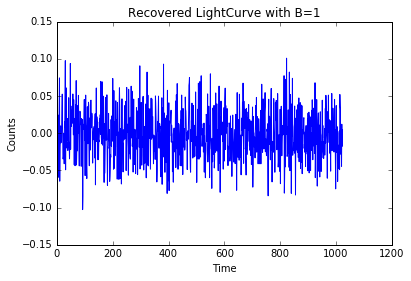

In [22]:
f = simulate(1)
plt.plot(np.real(f))    
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Recovered LightCurve with B=1')

Try out with `B=2` to get _random walk_ distribution.

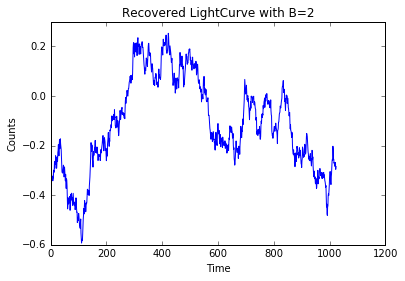

In [23]:
f = simulate(2)
plt.plot(np.real(f))    
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Recovered LightCurve with B=2')